In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Aula dia 24/01

In [19]:
# Inicios
P = 24E3 #Cargas
n = 3    #Qtd de parafusos


# Encontrar o centroide
df = pd.DataFrame()
df['Xi'] = [-150, 150, 0]
df['Yi'] = [0, 0, -300]

df.sum()/3

Xi      0.0
Yi   -100.0
dtype: float64

In [20]:
# Encontrando o vetor posição r
r1 = np.sqrt(150**2 + 100**2)
r2 = r1
r3 = 300-100

# Momento
M = 150E-3 * P


In [23]:
F1i = P/n
F1i

8000.0

In [25]:
5/1.414

3.5360678925035365

## Aula 25/01 - Projeto de soldas 

In [1]:
from sympy import *
from sympy.abc import *
import numpy as np

Aw = pi*d
Sw = (pi*d**2)/(4)
Jw = (pi*d**3)/4



In [67]:

a = 0.175
r = 0.120

#Cortante
fs = P/Aw

#Momento flexão
fb = (P*a)/(Sw)

#Torção
ft = ((P*r)*(d/2))/Jw

In [72]:
Fr = sqrt(fs**2 + fb**2 + ft**2)
Fr

sqrt(P**2/(d**2*pi**2) + 0.5476*P**2/(d**4*pi**2))

In [78]:
sigma = 124E6
t = Fr/sigma
#a = Eq(Fr, 0.005*np.cos(np.radians(45)))
t

8.06451612903226e-9*sqrt(P**2/(d**2*pi**2) + 0.5476*P**2/(d**4*pi**2))

In [82]:
exp = Eq(t, 0.005*np.cos(np.radians(45)))
num = exp.subs({d:0.025, pi:np.pi})
solve(num) #Newtons de força

[-1162.59155406151, 1162.59155406151]

## Teste 5 - 

In [15]:
from sympy import * 
from sympy.abc import *
import numpy as np
import matplotlib.pyplot as plt

init_printing()

import warnings
warnings.filterwarnings("ignore")

sa, sm, sf_, sut, nf, ktf, ktt = symbols("\sigma'_a \sigma'_m S_f S_{ut}, N_f k_{tf} k_{tt}") 

#Função pra calcular sf'
def Sf_l(kc, kd, sf):
    ka = 1 #flexão equivalente
    kb = 1.189*((D*1000)**-0.097)
    #kb = D*1.189*((1000)**-0.097)
    return(ka*kb*kc*kd*(0.5*sf))

#Critério de falha
falha = Eq(sa/sf_ + sm/sut, 1/nf)
falha

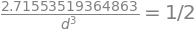

In [8]:
ka = 1
kb = 1.189*((d*1000)**-0.097) # expressão é em mm por isso *1000 -> transformar m (d) to mm p/ expressão
kc = 0.75
kd = 0.814

r = ka*kb*kc*kd*372.5
r = r.subs({d:1})
r

num = falha.subs({sa:35051.79, sf_:1000*a*d**3, sm:35051.79, sut:1000*108*d**3, nf:2})
num

In [9]:
solve(num)

In [30]:
ka = 1
kb = 1.189*((d*1000)**-0.097) # expressão é em mm por isso *1000 -> transformar m (d) to mm p/ expressão
kc = 0.75
kd = 0.814

r = ka*kb*kc*kd*372.5
r = r.subs({d:1})
r

num = falha.subs({sa:1619.46, sf_:1e6*r*d**3, sm:1619.46, sut:1e6*745*d**3, nf:2})
num

solve(num)